# Analisi delle componenti principali {#sec-pca}

In [23]:
here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(car)

## Radici e vettori latenti

Dal determinante di una matrice si possono ricavare le *radici latenti* o *autovalori* (denotati da $\lambda_i$) e i *vettori latenti* o *autovettori* della matrice. Alle nozioni di autovalore e autovettore verrà qui fornita un'interpretazione geometrica.

Simuliamo i dati di due variabili tra loro associate:

In [25]:
set.seed(123456)
options(repr.plot.width = 8, repr.plot.height = 8)

npoints <- 20
x <- as.numeric(scale(rnorm(npoints, 0, 1)))
y <- as.numeric(scale(3 * x + rnorm(npoints, 0, 2)))
mean(x) |> print()
mean(y) |> print()
cov(cbind(x, y)) |> print()

[1] -2.775558e-17
[1] -7.771561e-17
          x         y
x 1.0000000 0.8291033
y 0.8291033 1.0000000


Disegnamo il diagramma di dispersione con un'ellisse che contiene la nube di punti:

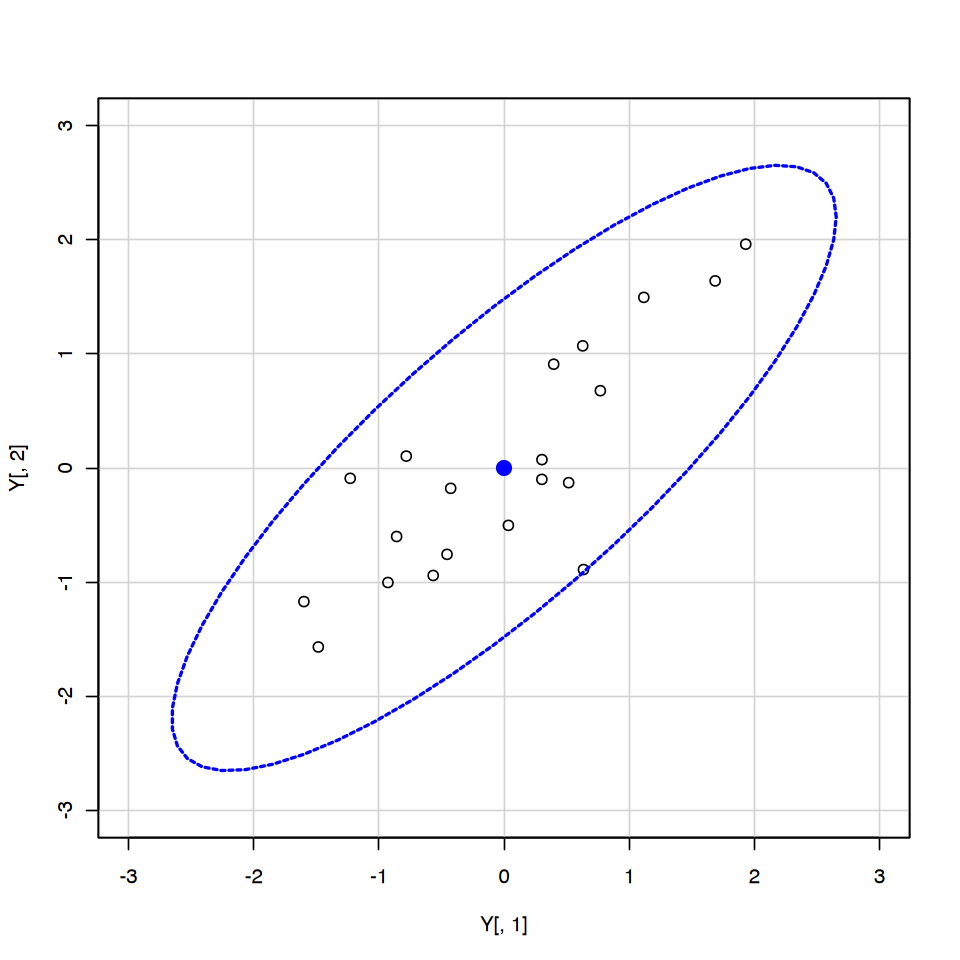

In [27]:
Y <- cbind(x, y)

car::dataEllipse(
  Y[, 1], Y[, 2],
  levels = 0.95,
  lty = 2,
  ylim = c(-3, 3),
  xlim = c(-3, 3)
)

Se racchiudiamo le osservazioni ($v_1, v_2$) con un'ellisse, allora la
lunghezza dei semiassi maggiori e minori dell'ellisse sarà proporzionale
a $\sqrt{\lambda_1}$ e $\sqrt{\lambda_2}$. L'asse maggiore è la linea
passante per il punto ($\bar{v_1}, \bar{v_2}$) nella direzione
determinata dal primo autovettore $\boldsymbol{a}_1'$ con pendenza
uguale a $a_{12}/a_{11}$. L'asse minore è la linea passante per il punto
($\bar{v_1}, \bar{v_2}$) nella direzione determinata dal secondo
autovettore $\boldsymbol{a}_2$.

Calcoliamo ora gli autovettori e gli autovalori:

In [28]:
s <- cov(Y)
ee <- eigen(s)
ee |> print()

eigen() decomposition
$values
[1] 1.8291033 0.1708967

$vectors
          [,1]       [,2]
[1,] 0.7071068 -0.7071068
[2,] 0.7071068  0.7071068



In [29]:
# First eigenvector 
ev_1 <- ee$vectors[, 1]

# Slope of the first eigenvector
ev1_m <- ev_1[2] / ev_1[1]

# Second eigenvector 
ev_2 <- ee$vectors[, 2]

# Slope of the second eigenvector
ev2_m <- ev_2[2] / ev_2[1]

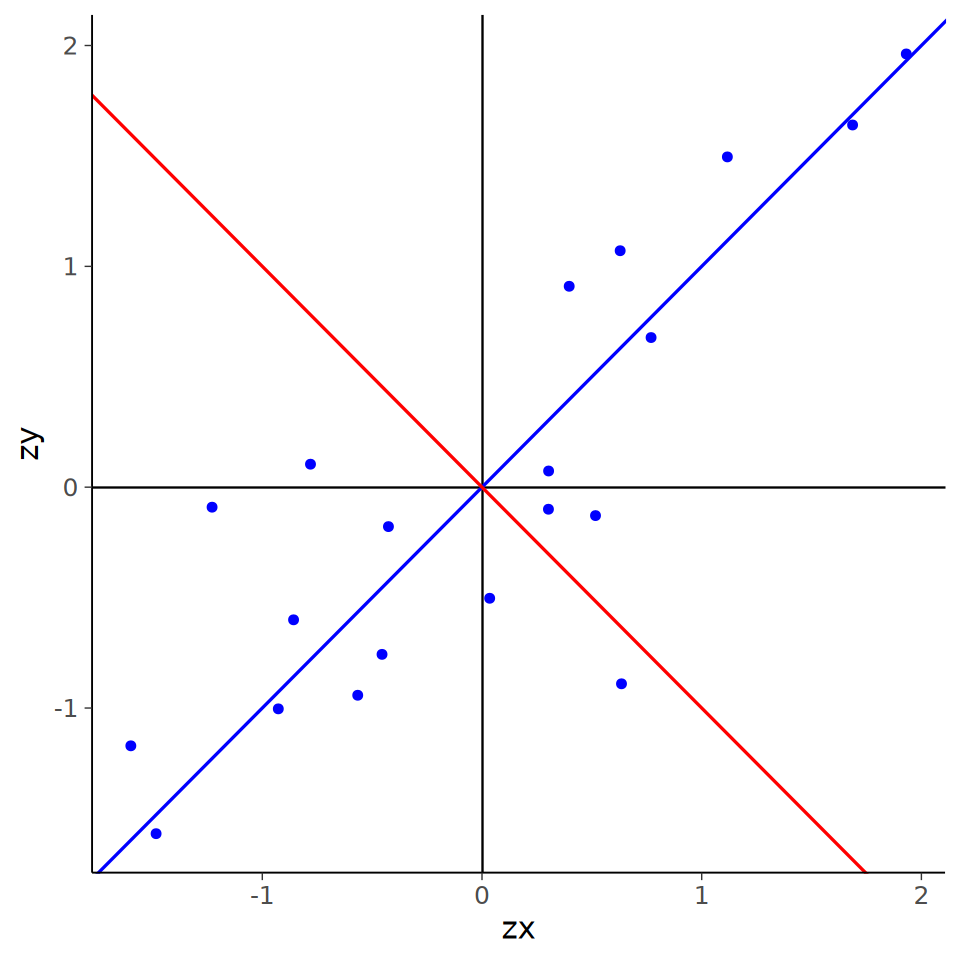

In [30]:
# Scatter plot showing the span of both eigenvectors 
data.frame(zx=scale(x), zy=scale(y))  |>
ggplot(aes(x = zx, y = zy)) +
  geom_point(color = "blue", size = 2) +
  geom_vline(xintercept = 0, linewidth = .5) +
  geom_hline(yintercept = 0, linewidth = .5) +
  geom_abline(slope = ev1_m, color = "blue", linewidth = 0.7) +
  geom_abline(slope = ev2_m, color = "red", linewidth = 0.7) 

Gli autovettori sono ortogonali:

In [31]:
# Multiply both eigenvectors 
print(ev_1 %*% ev_2)

             [,1]
[1,] 2.237114e-17


Generiamo uno Scree Plot.

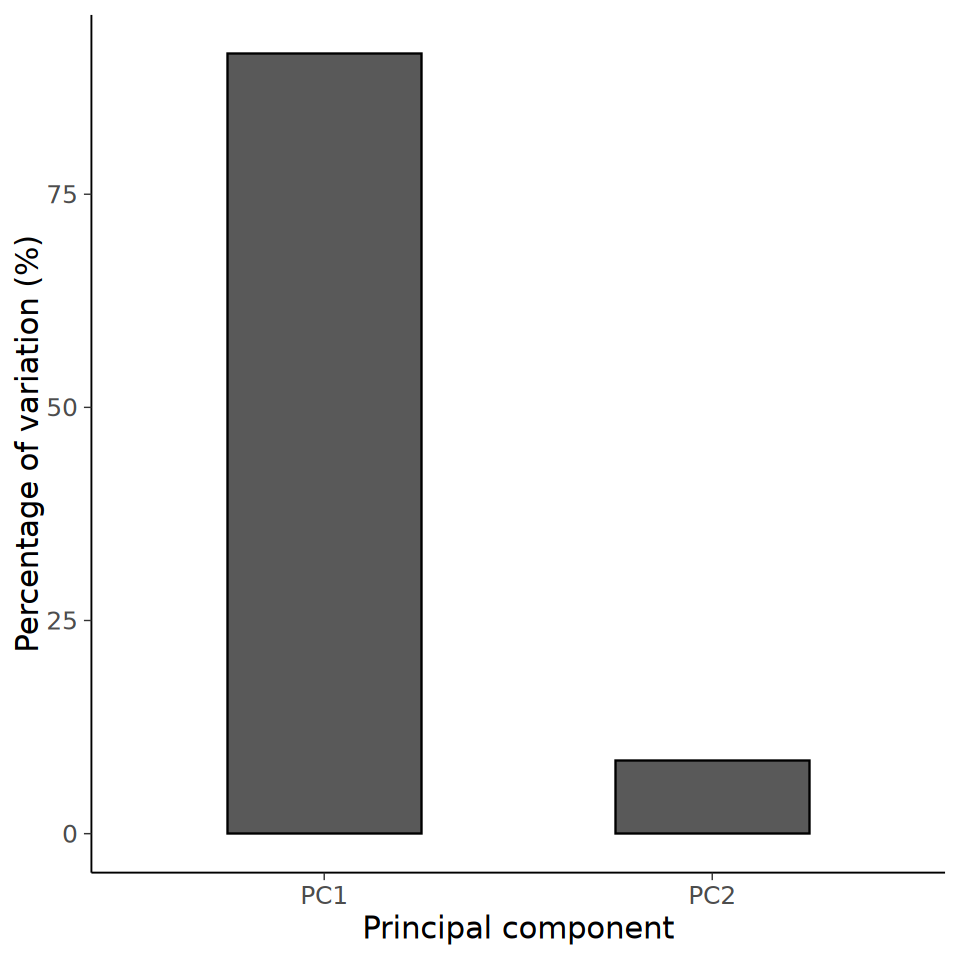

In [32]:
# Calculate the estimated variance for each eigenvalue
e_var <- ee$values / (length(x) - 1)

# Data frame with variance percentages
var_per <- tibble(
  PC  = c("PC1", "PC2"),
  PER = c(e_var) * 100 / sum(e_var) # Calculate the percentage
    )

# Scree plot 
ggplot(var_per, aes(x = PC, y = PER)) +
  geom_col(width = 0.5, color = "black") +
  xlab("Principal component") +
  ylab("Percentage of variation (%)") 

## Varianza Totale di una Matrice

Quando si parla di varianza totale di una matrice, come ad esempio la matrice dei dati $Y$, si fa riferimento ad una misura della variabilità complessiva dei dati contenuti in quella matrice. 

* **Varianza per Colonna:** Ogni colonna della matrice $Y$ rappresenta una variabile. La varianza di una singola colonna ci indica quanto i valori di quella variabile si disperdono attorno alla loro media.
* **Somma delle Varianze:** La varianza totale della matrice è semplicemente la somma delle varianze di tutte le colonne. Questa somma ci dà un'idea complessiva di quanto i dati variano in tutte le direzioni.

Un risultato importante è che **la somma degli autovalori della matrice di covarianza** (o della matrice di correlazione) associata alla matrice dei dati $Y$ è **uguale alla varianza totale** della matrice.

Sia $Y$ una matrice di dati con $p$ colonne (variabili). La varianza totale di $Y$ può essere calcolata come:

```
Varianza Totale = Σ Var(Y[,i])
```

dove $Var(Y[,i])$ è la varianza della i-esima colonna di $Y$.

In [33]:
var(x) + var(y)

[1] 2

In [32]:
ee$values |> sum()

[1] 2

Gli autovettori ottenuti utilizzando la funzione `eigen()` sono normalizzati. Ciò significa che la loro lunghezza è uguale a 1:

In [33]:
t(as.matrix(ee$vectors[, 1])) %*% as.matrix(ee$vectors[, 1]) |> print()


     [,1]
[1,]    1


Utilizziamo le informazioni degli autovettori e degli autovalori per disegnare gli assi dell'ellisse: 

- gli autovettori determinano la direzione degli assi; 
- la radice quadrata degli autovalori è proporzionale alla lunghezza degli assi dell'ellisse.

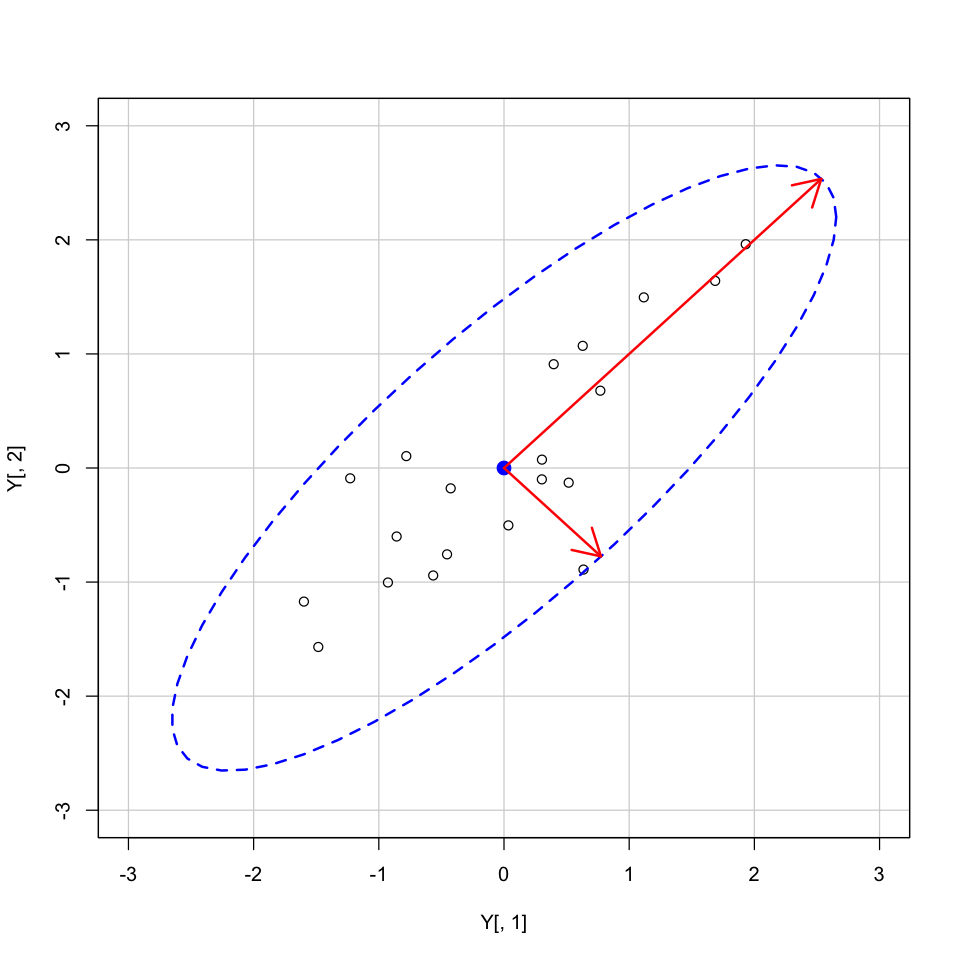

In [58]:
car::dataEllipse(
  Y[, 1], Y[, 2],
  levels = 0.95,
  lty = 2,
  ylim = c(-3, 3),
  xlim = c(-3, 3)
)
k <- 2.65
arrows(
  0, 0, 
  k * sqrt(ee$values[1]) * ee$vectors[1],
  k * sqrt(ee$values[1]) * ee$vectors[2],
  code = 2, 
  col = "red", 
  lwd = 2
)
arrows(
  0, 0, 
  k * sqrt(ee$values[2]) * ee$vectors[1],
  k * sqrt(ee$values[2]) * -ee$vectors[2],
  code = 2, 
  col = "red", 
  lwd = 2
)

Tale analisi si può estendere a qualunque numero di variabili. Per
esempio, nel caso di tre variabili, possiamo pensare di disegnare un
ellisoide attorno ad una nube di punti nello spazio tridimensionale.
Anche in questo caso, gli autovalori e gli associati autovettori
corrisponderanno agli assi dell'elissoide.

## Riduzione di dimensionalità

L'analisi precedente, mirata a offrire una lettura geometrica degli autovettori e autovalori, pone le premesse per un approccio avanzato nell'analisi multivariata, noto come Analisi delle Componenti Principali (PCA). Questo metodo sfrutta la proiezione ortogonale dei dati su assi definiti dagli autovettori per calcolare i cosiddetti *punteggi delle componenti principali*.

La PCA si propone di semplificare la complessità dei dati riducendone le dimensioni. Ad esempio, se due variabili mostrano un'elevata correlazione, la prima componente principale può racchiudere l'essenza della loro varianza. In pratica, potrebbe risultare più efficace basarsi sui punteggi della prima componente principale piuttosto che sui punteggi derivanti dalle due variabili separate.

La varianza totale dei dati è rappresentata dalla somma degli autovalori, equivalenti alla traccia della matrice di covarianza. La prima componente principale incapsula una porzione di varianza pari al suo corrispondente autovalore. Se il rapporto tra questo primo autovalore e la varianza totale è elevato (per esempio, 0.8), optare per i punteggi della prima componente principale offre un vantaggio nell'interpretazione e nella riduzione dimensionale dei dati.

L'implementazione della PCA si basa su proiezioni ortogonali: i punteggi della prima componente sono determinati proiettando i dati lungo l'asse del primo autovettore, mentre i punteggi della seconda componente derivano dalla proiezione lungo il secondo autovettore, e così via per le componenti successive.

Dal punto di vista formale, la PCA è una tecnica di riduzione della dimensionalità lineare che mira a identificare le direzioni nello spazio dei dati lungo le quali la varianza è massima. Matematicamente, la PCA corrisponde alla ricerca degli autovettori e degli autovalori della matrice di covarianza dei dati.



## Calcolo delle Componenti Principali

L’analisi precedente, volta a una comprensione geometrica di autovettori e autovalori, fornisce le basi per un metodo avanzato nell'analisi multivariata: l'Analisi delle Componenti Principali (PCA). La PCA si basa sulla proiezione ortogonale dei dati su assi definiti dagli autovettori per calcolare i cosiddetti *punteggi delle componenti principali*.

La PCA ha come obiettivo principale la riduzione della dimensionalità dei dati mantenendo quanta più varianza possibile. Ad esempio, se due variabili sono fortemente correlate, la prima componente principale può catturare gran parte della loro varianza, rendendo superfluo utilizzare entrambe le variabili originali. In questi casi, l’analisi può concentrarsi sulla prima componente principale per una rappresentazione semplificata e informativa dei dati.

La varianza totale dei dati è rappresentata dalla somma degli autovalori, equivalenti alla traccia della matrice di covarianza. La prima componente principale cattura una porzione di varianza pari al suo autovalore: se il rapporto tra questo autovalore e la varianza totale è alto (ad esempio, 0,8), utilizzare solo la prima componente principale può essere vantaggioso per l’interpretazione e per la riduzione dimensionale.

Il processo di PCA si basa sulle proiezioni ortogonali: i punteggi della prima componente principale sono ottenuti proiettando i dati lungo la direzione del primo autovettore, quelli della seconda componente lungo il secondo autovettore, e così via per le componenti successive.

Da un punto di vista formale, la PCA è una tecnica di riduzione della dimensionalità lineare che mira a identificare le direzioni nello spazio dei dati lungo cui la varianza è massima. Matematicamente, la PCA si traduce nella ricerca degli autovettori e degli autovalori della matrice di covarianza dei dati.

Sia $X$ una matrice di dati di dimensioni $n \times p$, con $n$ osservazioni e $p$ variabili. Il problema della PCA consiste nel trovare una matrice di trasformazione ortogonale $P$ tale che la proiezione dei dati nello spazio definito dai vettori colonna di $P$ massimizzi la varianza spiegata.

### Procedura PCA

1. **Calcolo della matrice di covarianza:** Si calcola la matrice di covarianza $\Sigma$ dei dati.
2. **Calcolo di autovettori e autovalori:** Si determinano gli autovettori e gli autovalori di $\Sigma$.
3. **Ordinamento degli autovalori:** Gli autovalori vengono ordinati in ordine decrescente.
4. **Selezione delle componenti principali:** Si scelgono i primi $k$ autovettori associati agli $k$ autovalori più grandi, dove $k$ è il numero di componenti principali desiderato.
5. **Proiezione dei dati:** I dati originali vengono proiettati nelle nuove dimensioni (le componenti principali) moltiplicando la matrice dei dati $X$ per la matrice degli autovettori selezionati.

### Proprietà della PCA

- **Ortogonalità delle componenti principali:** Le componenti principali sono tra loro ortogonali, quindi non correlate.
- **Massimizzazione della varianza:** Ogni componente principale massimizza la varianza non spiegata dalle componenti precedenti.
- **Interpretazione delle componenti:** Le componenti principali possono essere interpretate in base al contributo di ciascuna variabile originale.

### Applicazioni della PCA

La PCA è utile in vari campi, inclusi:

- **Riduzione della dimensionalità:** Per visualizzare dati ad alta dimensionalità o usare algoritmi che non scalano bene con l'aumento delle dimensioni.
- **Pre-elaborazione:** Come passaggio preliminare per altri algoritmi di apprendimento automatico.
- **Esplorazione dei dati:** Per identificare relazioni tra variabili e individuare outlier.

## Un esempio pratico

Eseguiamo la PCA con i dati dell'esempio precedente.

### Passo 1: proiettare i dati su PC1

Usiamo il primo autovettore per proiettare i punti del diagramma a dispersione su PC1.

In [47]:
proj_pc1 <- Y %*% ee$vectors[, 1]

Il codice precedente rappresenta il calcolo della **proiezione dei punti** sulla **prima componente principale (PC1)**.

1. **Matrice dei dati (`Y`)**: La variabile `Y` contiene i dati originali, ovvero le coordinate dei punti nel piano bidimensionale (con le variabili `x` e `y`).

2. **Autovettore della prima componente principale (`ee$vectors[, 1]`)**: La funzione `eigen(s)` ha calcolato gli autovettori e gli autovalori della matrice di covarianza `s` di `Y`. Qui, `ee$vectors[, 1]` rappresenta il **primo autovettore**, che indica la direzione della prima componente principale, ossia la direzione lungo la quale la varianza dei dati è massima.

3. **Proiezione tramite prodotto scalare (`%*%`)**: Moltiplicando la matrice dei dati `Y` per il primo autovettore (`ee$vectors[, 1]`) otteniamo le **proiezioni ortogonali dei punti sulla prima componente principale**.
   
   - In pratica, questa moltiplicazione matrice-vettore (prodotto scalare) calcola, per ciascun punto, la sua **posizione lungo la direzione di PC1**. Così, otteniamo un nuovo vettore `proj_pc1`, dove ogni elemento rappresenta la **coordinata del punto proiettato** sulla linea di PC1.
  
In altre parole, `proj_pc1` contiene le coordinate dei punti di `Y` trasformate rispetto alla direzione di PC1, cioè i **punteggi sulla prima componente principale**. Questo valore ci permette di ridurre i dati lungo la direzione di massima varianza, mantenendo l'informazione più importante per l'analisi geometrica e statistica dei dati.

### Passo 2: trasformare le proiezioni dei punti nel sistema di coordinate originale

In [44]:
# Multiply the projections by the first eigenvector to get the coordinates of each point on the PC1 line
proj_points <- proj_pc1 %*% t(ee$vectors[, 1])

1. **Proiezione su PC1 (`proj_pc1`)**: Nel passaggio precedente, abbiamo calcolato `proj_pc1`, ovvero le coordinate dei punti proiettati lungo la direzione della prima componente principale. `proj_pc1` rappresenta le posizioni dei punti **sulla linea di PC1**, ma queste sono coordinate in un sistema monodimensionale lungo PC1, non nel sistema di coordinate originale.

In [42]:
proj_pc1 |> print()

            [,1]
 [1,]  0.1433279
 [2,] -0.4783489
 [3,] -1.0310925
 [4,] -0.4272913
 [5,]  2.3525898
 [6,]  0.2662514
 [7,]  1.0233550
 [8,]  2.7528463
 [9,]  1.2018891
[10,] -1.3653244
[11,] -2.1583203
[12,] -1.9583216
[13,] -1.0661361
[14,] -0.1805248
[15,]  0.2744032
[16,] -0.8569996
[17,] -0.9327390
[18,]  0.9239992
[19,]  1.8473282
[20,] -0.3308917


2. **Moltiplicazione per l’autovettore (`%*% t(ee$vectors[, 1])`)**: Per riportare questi punti nel **sistema di coordinate originale** (con assi `x` e `y`), moltiplichiamo i punteggi di PC1 (`proj_pc1`) per la **trasposta** del primo autovettore, `t(ee$vectors[, 1])`.
   
   - `t(ee$vectors[, 1])` è la trasposta del primo autovettore, che trasforma un vettore colonna in un vettore riga. Questa trasposizione consente di moltiplicare `proj_pc1`, che è un vettore monodimensionale (contiene le proiezioni lungo PC1), per una matrice 1x2, generando così **le coordinate di ogni punto** nel sistema bidimensionale originario.

3. **Risultato finale (`proj_points`)**: `proj_points` è una matrice che contiene le coordinate `(x, y)` di ogni punto proiettato lungo la linea di PC1, ma **espresso nel sistema di coordinate originale**. In altre parole, ogni riga di `proj_points` rappresenta il punto originale `Y` proiettato sulla linea di PC1, riportato nel sistema `x` e `y`.

In [45]:
proj_points |> print()

            [,1]       [,2]
 [1,]  0.1013481  0.1013481
 [2,] -0.3382437 -0.3382437
 [3,] -0.7290925 -0.7290925
 [4,] -0.3021406 -0.3021406
 [5,]  1.6635322  1.6635322
 [6,]  0.1882682  0.1882682
 [7,]  0.7236212  0.7236212
 [8,]  1.9465563  1.9465563
 [9,]  0.8498639  0.8498639
[10,] -0.9654301 -0.9654301
[11,] -1.5261629 -1.5261629
[12,] -1.3847425 -1.3847425
[13,] -0.7538720 -0.7538720
[14,] -0.1276503 -0.1276503
[15,]  0.1940324  0.1940324
[16,] -0.6059903 -0.6059903
[17,] -0.6595461 -0.6595461
[18,]  0.6533661  0.6533661
[19,]  1.3062583  1.3062583
[20,] -0.2339757 -0.2339757


**Interpretazione.** 
Questo passaggio ci permette di visualizzare la posizione di ogni punto lungo la linea di PC1, **come se i punti fossero "ritrasformati" nel sistema originario di assi `x` e `y`**. Così facendo, possiamo tracciare i punti proiettati nel grafico bidimensionale iniziale, visualizzando la relazione tra i dati e la direzione di massima varianza (PC1).

### Passo 3: Visualizzazione

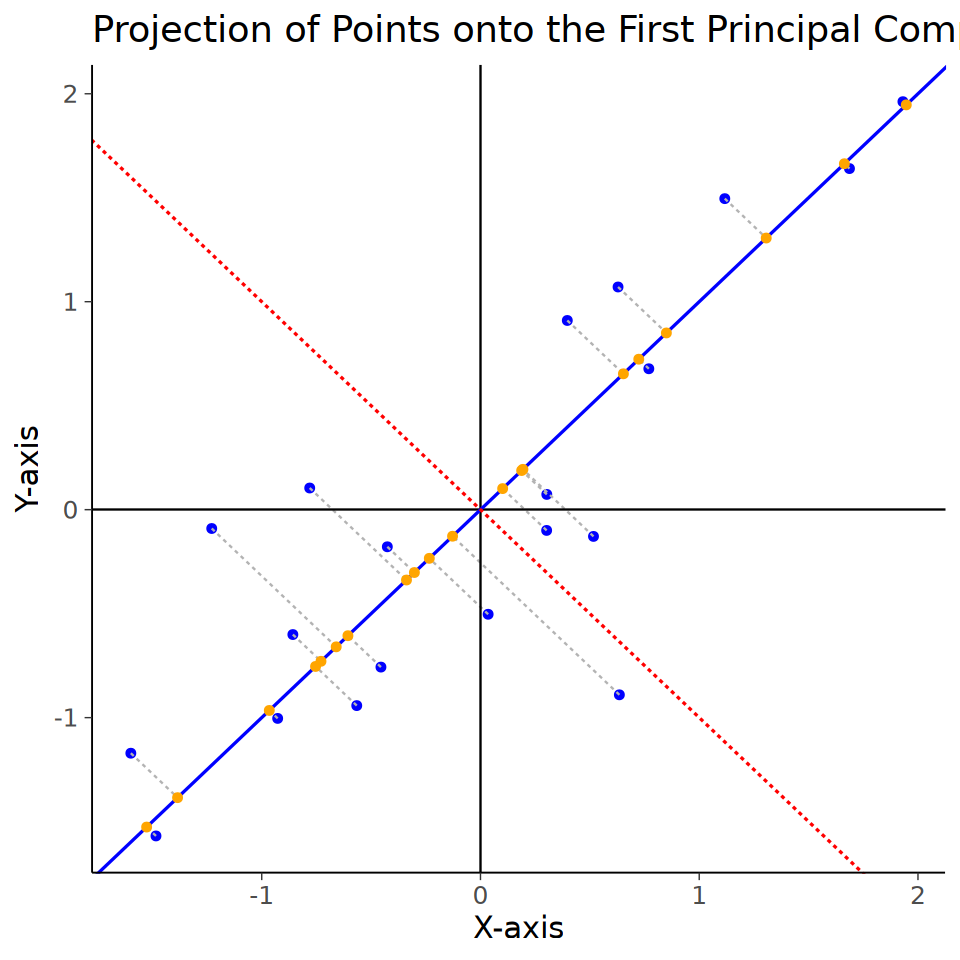

In [39]:
# Prepare the data for plotting
data_proj <- data.frame(
    x = Y[, 1],
    y = Y[, 2],
    x_proj = proj_points[, 1],
    y_proj = proj_points[, 2]
)

# Plot the original data points, the PC1 line, and the projections
ggplot(data_proj, aes(x = x, y = y)) +
    geom_point(color = "blue", size = 2) +
    geom_segment(aes(xend = x_proj, yend = y_proj), color = "grey70", linetype = "dashed") +
    geom_vline(xintercept = 0, linewidth = .5) +
    geom_hline(yintercept = 0, linewidth = .5) +
    geom_abline(slope = ev1_m, color = "blue", linewidth = 0.7, linetype = "solid") +
    geom_abline(slope = ev2_m, color = "red", linewidth = 0.7, linetype = "dashed") +
    geom_point(aes(x = x_proj, y = y_proj), color = "orange", size = 2) +
    labs(
        title = "Projection of Points onto the First Principal Component",
        x = "X-axis", y = "Y-axis"
    )

### Passo 4: Calcolo della varianza delle coordinate della proiezione su PC1

In [46]:
var_proj_pc1 <- var(proj_pc1)
cat("Variance of projections on PC1:", var_proj_pc1, "\n")
cat("First eigenvalue:", ee$values[1], "\n")

Variance of projections on PC1: 1.829103 
First eigenvalue: 1.829103 


Confrontiamo il risultato con quello ottenuto mediante la funzione `princomp` di R. 

In [ ]:
pca_mod <- princomp(Y)

Calcoliamo i punteggi delle due "componenti principali".

In [54]:
pca_scores <- pca_mod$scores
pca_scores |> head()

Comp.1,Comp.2
0.1433279,0.2843804
-0.4783489,-0.6256511
-1.0310925,-0.1818790
-0.4272913,-0.1749611
2.3525898,0.0329488
0.2662514,0.1624602


I punteggi delle componenti principali forniti da `princomp` sono identici a quelli trovati in precedenza.

In [55]:
cor(proj_pc1, pca_scores[, 1]) |> print()

     [,1]
[1,]    1


La varianza di questi punteggi corrisponde agli autovalori:

In [56]:
var(pca_scores[, 1])

[1] 1.829103

In [57]:
ee$values[1]

[1] 1.829103

<!--chapter:end:900_lin_alg.Rmd-->

